Modelagem de tópicos em artigos de notícias do New York Times
---------------------------------------------------------------------------------------------

**Universidade Federal de Minas Gerais - Escola de Ciência da Informação**
- **Disciplina**: Representaçoes Distribuídas de Texto e Modelagem de Tópicos
- **Professor**: Renato Rocha
- **Aluno**: Rommel Vieira Carneiro

Neste trabalho, foi utilizado o algoritmo de Modelagem de Tópicos denominado por Latent Dirichtlet Allocation (LDA) para identificação de tópicos em um conjunto de artigos de uma base do New York Times disponível no Kaggle (https://www.kaggle.com/nzalake52/new-york-times-articles). 

A modelagem de tópicos é um assunto de pesquisa na área de Inteligência Artificial que é tratado por algoritmos não supervisionados de Machine Learning. O algoritmo mais utilizado para esse propósito é o LDA que estabelece um modelo estatístico para conjuntos de documentos.

O dataset utilizado é provido como um arquivo único em formato texto plano e cada artigo é identificado pela URL de origem seguido pelo texto do artigo em inglês. Foram extraídos um total de 8888 artigos desta base que passaram por um processo de limpeza que contou com as seguintes etapas: (1) extração apenas dos substantivos com uso do POS Tagger do pacote NLTK, (2) retirada de caracteres de pontuação, (3) retirada de stop words e numeros, além da (4) normalização feita por meio de um lematizador.

O algoritmo de LDA foi executado com geração inicial de 5 tópicos e depois de 10 tópicos. Neste último o resultado foi mais interessante por retratar agrupamentos de palavras que permitiram a identificação de tópicos muito próximos a editorias de um jornal comum. A saber: 

1. Tópico 1: Alimentação e Gastronomia
2. Tópico 2: Eleição
3. Tópico 3: Cinema e Cultura
4. Tópico 4: Economia
5. Tópico 5: Educação
6. Tópico 6: Esportes
7. Tópico 7: Negócios
8. Tópico 8: Governo
9. Tópico 9: Saúde
10. Tópico 10: Segurança


Fontes de Pesquisa:
 - Introdução a Ciência de Dados - Modelagem de Tópicos e agrupamento de documentos (https://github.com/hidroware/aulaRenatoRocha/blob/master/notebooks/heber25-ML_UNSUP_TopicModeling_Clustering.ipynb)
 - Topic modeling visualization – How to present the results of LDA models? (https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/)
 - Probabilistic Topic Models (http://www.cs.columbia.edu/~blei/papers/Blei2012.pdf)
 - Gensim - models.ldamodel – Latent Dirichlet Allocation (https://radimrehurek.com/gensim/models/ldamodel.html)
 - Natural Language Processing with Python (https://www.nltk.org/book/)
 - Part of Speech Tagging with Stop words using NLTK in python (https://www.geeksforgeeks.org/part-speech-tagging-stop-words-using-nltk-python/)
 - Kaggle - New York Times Articles (https://www.kaggle.com/nzalake52/new-york-times-articles)


In [59]:
import re
import os
import codecs
import string
import numpy as np
import pandas as pd
import gensim

import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import feature_extraction
import mpld3

import pyLDAvis
import pyLDAvis.gensim
from IPython.display import Image
print ('Job done!')

Job done!


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rommel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rommel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rommel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [61]:
# Carrega todos os documentos da lingua inglesa
#base_dir = 'docs_txt\\en\\'

base_dir = 'dataset\\'



# Declara lista de documentos
raw_documents = []

for filename in os.listdir(base_dir):
    if filename.endswith(".txt"): 
        file = open (base_dir + filename, encoding="utf8")
        file_lines = file.readlines()
        content = ' '.join (file_lines)
        file.close ()
        
        raw_documents.append (content)

print("Number of documents:",len(raw_documents))

Number of documents: 8888


In [62]:
# Preparação e limpeza dos documentos: (1) Stopwords, (2) tokenização e (3) Lematização
stop = set(stopwords.words('english'))
#stop.update(["ontology", "system", "information", "1", "2", "al", "semantic", "data", "model", "example", "result", "et' al'", "one", "knowledge"])
print (stop)

{"shouldn't", 'then', 'what', 'again', 'until', 'wouldn', 'over', "couldn't", 'himself', "needn't", 'their', 'while', 'mustn', 'your', 'themselves', 'this', 'should', 'as', 'on', 'why', 'm', 'above', "aren't", 'ourselves', 'its', 'those', 'out', 'he', 'there', "didn't", "weren't", 'further', 're', 'they', "she's", 'yours', 'couldn', 'with', 'same', 'does', 'wasn', 'won', 'if', 'own', 'didn', 'been', 'such', 'me', 'll', "mightn't", "it's", "should've", 'up', 'it', "you'll", "hadn't", 'so', 'just', 'her', 'yourselves', 'had', 'the', 've', 'our', 'from', 'but', 'doesn', 'hasn', 'am', 'shan', 'both', 'some', 'between', 'during', 'him', 'few', 'a', 'than', 'did', 'you', 'off', 'whom', 'about', "you've", 'most', 'mightn', 'or', 'were', 'be', 's', 'y', "you're", 'itself', 'an', 'we', 'haven', 'herself', 'weren', 'needn', 'which', 'through', 'ma', 'having', 'are', 'of', 'who', 'now', 'that', 'will', 'once', 'she', 'very', 'how', 'them', 'is', 'was', 'all', "wasn't", 'where', 'and', 'too', 'to'

In [63]:
# Remove as palavras denecessárias dos documentos

exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean(doc):
    auxterms_free = [word for word, pos in nltk.pos_tag
                     (nltk.word_tokenize(doc)) if pos in {'NN', 'NNS' 'NNP', 'NNPS'} ]
    punc_free = ''.join(ch for ch in " ".join(auxterms_free) if ch not in exclude)
    stop_free = " ".join([i for i in punc_free.lower().split() if i not in stop])
    number_free = ' '.join(w for w in stop_free.split() if not w.isnumeric() if len (w) > 2)
    normalized = " ".join(lemma.lemmatize(word) for word in number_free.split())
    
    return normalized

clean_documents = [clean(doc).split() for doc in raw_documents]
print ('Job done!')



Job done!


In [ ]:
# Analisando as palavras com uma Word Cloud
from wordcloud import WordCloud

def create_wordcloud(reviews):
  wordcloud = WordCloud(width = 3000,height = 2000,background_color = 'white').generate(str(reviews))
  fig = plt.figure(figsize = (8, 6))
  plt.imshow(wordcloud, interpolation = 'bilinear')
  plt.axis('off')
  plt.tight_layout(pad=0)
  plt.show()
    
create_wordcloud(clean_documents)

In [64]:
# Montando a matriz de documentos x termos
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(clean_documents)

In [65]:
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in clean_documents]
print ('Job done!')

Job done!


In [68]:
# Criando o modelo LDA
Lda = gensim.models.ldamodel.LdaModel

number_of_topics = 10

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary, passes=50)
print ('Job done!')

Job done!


In [70]:
x = ldamodel.print_topics(num_topics=10, num_words=10)
for y in x:
    print ("Tópico " + str(y[0]))
    palavras = y[1].split("+")
    for palavra in palavras:
        itens = palavra.split ("*")
        print("\t" + itens[1].replace('"', '') + " \t" + str (float(itens[0])*100) + "%")
    

Tópico 0
	food  	3.6999999999999997%
	restaurant  	2.1999999999999997%
	recipe  	1.3%
	wine  	1.3%
	chef  	1.0%
	chicken  	0.8%
	menu  	0.7000000000000001%
	dinner  	0.7000000000000001%
	day  	0.6%
	meat 	0.6%
Tópico 1
	state  	2.6%
	campaign  	2.1999999999999997%
	president  	1.6%
	country  	1.4000000000000001%
	party  	1.4000000000000001%
	government  	1.0999999999999999%
	election  	0.8999999999999999%
	republican  	0.8999999999999999%
	vote  	0.8%
	policy 	0.7000000000000001%
Tópico 2
	time  	1.4000000000000001%
	show  	1.2%
	way  	1.0%
	life  	0.8999999999999999%
	world  	0.8%
	something  	0.8%
	music  	0.8%
	work  	0.7000000000000001%
	film  	0.6%
	story 	0.6%
Tópico 3
	percent  	6.7%
	year  	2.6%
	city  	2.0%
	market  	1.6%
	oil  	1.5%
	economy  	1.4000000000000001%
	tax  	1.2%
	rate  	1.0999999999999999%
	growth  	1.0%
	money 	0.8999999999999999%
Tópico 4
	school  	2.1%
	art  	1.3%
	space  	1.2%
	building  	1.2%
	house  	1.2%
	room  	1.0999999999999999%
	home  	1.0%
	city  	1.0

Resultado com 5 tópicos

Tópico 0
	state  	2.0%
	government  	1.4000000000000001%
	law  	1.0%
	police  	1.0%
	case  	0.8999999999999999%
	country  	0.8%
	court  	0.8%
	city  	0.8%
	year  	0.7000000000000001%
	group 	0.7000000000000001%
Tópico 1
	game  	2.9000000000000004%
	team  	2.6%
	season  	2.3%
	time  	1.4000000000000001%
	year  	1.0999999999999999%
	series  	1.0%
	home  	1.0%
	player  	0.8999999999999999%
	night  	0.8%
	goal 	0.8%
Tópico 2
	city  	0.8%
	time  	0.8%
	home  	0.8%
	family  	0.7000000000000001%
	day  	0.6%
	room  	0.6%
	house  	0.6%
	building  	0.6%
	space  	0.5%
	way 	0.5%
Tópico 3
	campaign  	1.2%
	show  	1.0999999999999999%
	time  	1.0%
	party  	0.8999999999999999%
	way  	0.8%
	world  	0.7000000000000001%
	music  	0.7000000000000001%
	work  	0.6%
	year  	0.6%
	film 	0.6%
Tópico 4
	percent  	3.2%
	company  	3.1%
	year  	1.9%
	business  	1.0999999999999999%
	market  	1.0%
	state  	1.0%
	money  	0.8999999999999999%
	executive  	0.8%
	industry  	0.8%
	time 	0.7000000000000001%
    
    
Resultado com 10 Tópicos
Tópico 0
	food  	3.6999999999999997%
	restaurant  	2.1999999999999997%
	recipe  	1.3%
	wine  	1.3%
	chef  	1.0%
	chicken  	0.8%
	menu  	0.7000000000000001%
	dinner  	0.7000000000000001%
	day  	0.6%
	meat 	0.6%
Tópico 1
	state  	2.6%
	campaign  	2.1999999999999997%
	president  	1.6%
	country  	1.4000000000000001%
	party  	1.4000000000000001%
	government  	1.0999999999999999%
	election  	0.8999999999999999%
	republican  	0.8999999999999999%
	vote  	0.8%
	policy 	0.7000000000000001%
Tópico 2
	time  	1.4000000000000001%
	show  	1.2%
	way  	1.0%
	life  	0.8999999999999999%
	world  	0.8%
	something  	0.8%
	music  	0.8%
	work  	0.7000000000000001%
	film  	0.6%
	story 	0.6%
Tópico 3
	percent  	6.7%
	year  	2.6%
	city  	2.0%
	market  	1.6%
	oil  	1.5%
	economy  	1.4000000000000001%
	tax  	1.2%
	rate  	1.0999999999999999%
	growth  	1.0%
	money 	0.8999999999999999%
Tópico 4
	school  	2.1%
	art  	1.3%
	space  	1.2%
	building  	1.2%
	house  	1.2%
	room  	1.0999999999999999%
	home  	1.0%
	city  	1.0%
	work  	0.8999999999999999%
	college 	0.8999999999999999%
Tópico 5
	game  	3.2%
	team  	3.0%
	season  	2.4%
	time  	1.4000000000000001%
	year  	1.2%
	series  	1.0999999999999999%
	home  	1.0999999999999999%
	player  	1.0%
	goal  	0.8999999999999999%
	league 	0.8999999999999999%
Tópico 6
	company  	5.3%
	year  	1.9%
	business  	1.7999999999999998%
	executive  	1.4000000000000001%
	percent  	1.2%
	industry  	1.0999999999999999%
	money  	1.0%
	deal  	1.0%
	firm  	1.0%
	technology 	0.8999999999999999%
Tópico 7
	state  	2.0%
	water  	1.7000000000000002%
	government  	1.5%
	city  	1.3%
	country  	0.8999999999999999%
	war  	0.8%
	fire  	0.7000000000000001%
	island  	0.7000000000000001%
	time  	0.7000000000000001%
	group 	0.7000000000000001%
Tópico 8
	health  	2.9000000000000004%
	care  	1.7000000000000002%
	drug  	1.5%
	study  	1.3%
	father  	1.2%
	mother  	1.2%
	cancer  	1.2%
	research  	1.0999999999999999%
	son  	1.0999999999999999%
	program 	1.0%
Tópico 9
	police  	2.1999999999999997%
	case  	1.9%
	court  	1.7999999999999998%
	law  	1.7000000000000002%
	state  	1.5%
	government  	1.2%
	investigation  	0.8999999999999999%
	statement  	0.8999999999999999%
	lawyer  	0.8%
	office 	0.8%


In [89]:
# Visualização com o t-SNE Clustering Chart
# Fonte: Topic modeling visualization – How to present the results of LDA models?
# URL: https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
import matplotlib.colors as mcolors

# Get topic weights
topic_weights = []

#for i, row_list in enumerate(ldamodel[doc_term_matrix]):
#    topic_weights.append([w for i, w in row_list[0]])

topic_weights = []
for row_list in ldamodel[doc_term_matrix]:
    tmp = np.zeros(number_of_topics)
    for i, w in row_list:
        tmp[i] = w
    topic_weights.append(tmp)

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = number_of_topics
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8280 samples in 0.033s...
[t-SNE] Computed neighbors for 8280 samples in 0.757s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8280
[t-SNE] Computed conditional probabilities for sample 2000 / 8280
[t-SNE] Computed conditional probabilities for sample 3000 / 8280
[t-SNE] Computed conditional probabilities for sample 4000 / 8280
[t-SNE] Computed conditional probabilities for sample 5000 / 8280
[t-SNE] Computed conditional probabilities for sample 6000 / 8280
[t-SNE] Computed conditional probabilities for sample 7000 / 8280
[t-SNE] Computed conditional probabilities for sample 8000 / 8280
[t-SNE] Computed conditional probabilities for sample 8280 / 8280
[t-SNE] Mean sigma: 0.014922
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.819382
[t-SNE] KL divergence after 1000 iterations: 1.255589


Loading BokehJS ...

C:\ProgramData\Anaconda3\lib\site-packages\bokeh\core\property\container.py:102: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  return (isinstance(value, (collections.Container, collections.Sized, collections.Iterable))
C:\ProgramData\Anaconda3\lib\site-packages\bokeh\core\property\container.py:102: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  return (isinstance(value, (collections.Container, collections.Sized, collections.Iterable))


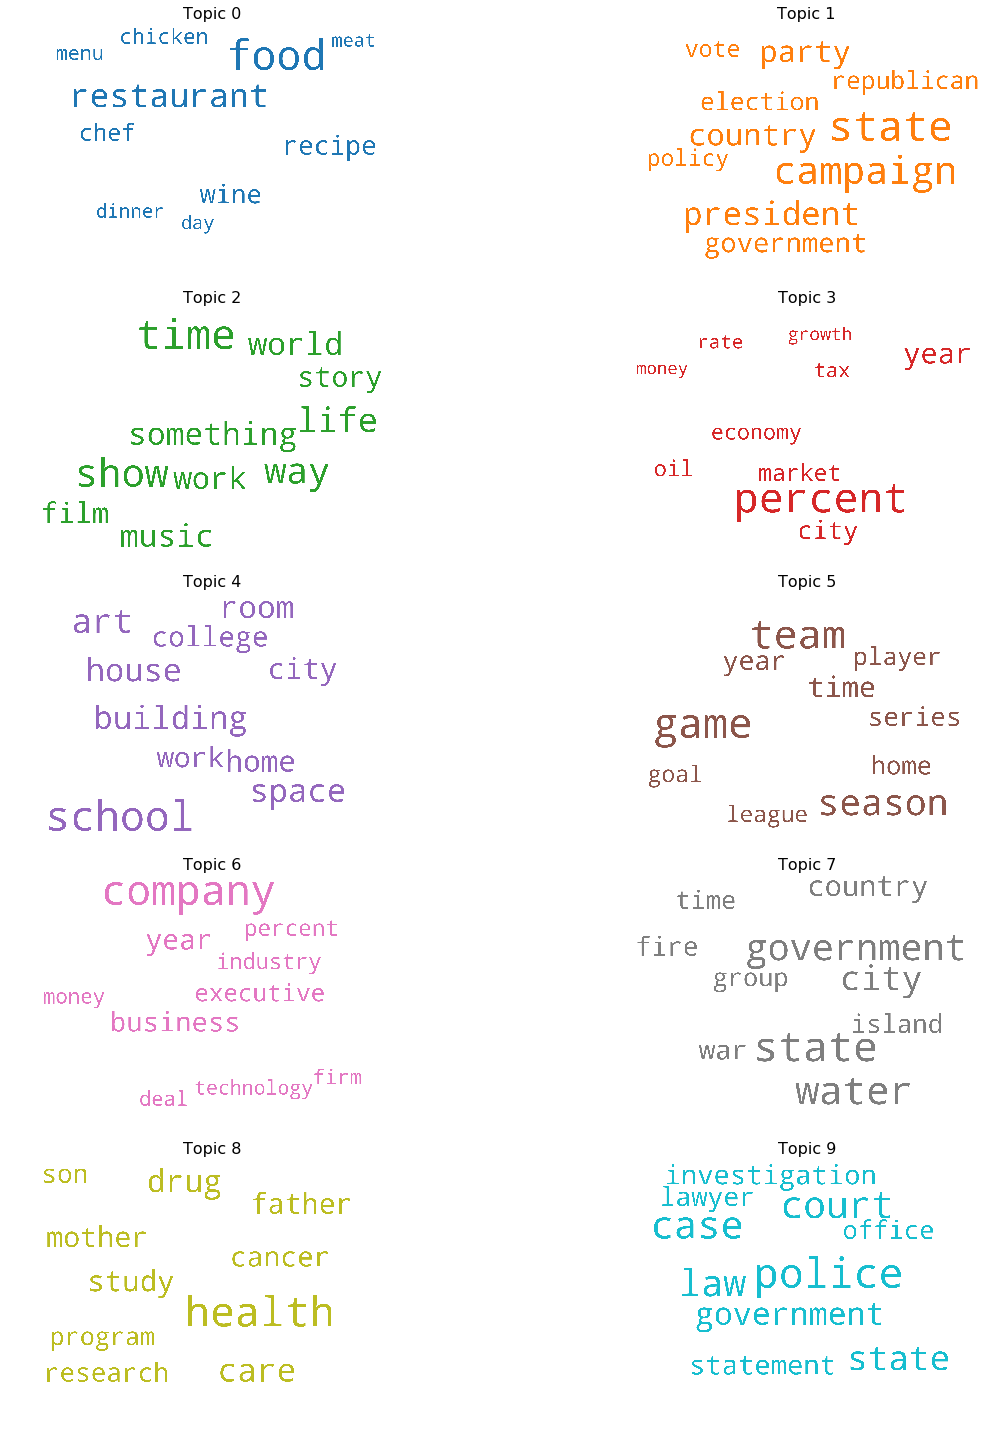

In [84]:
# Visualização com o WordCloud
# Fonte: Topic modeling visualization – How to present the results of LDA models?
# URL: https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel.show_topics(formatted=False)

fig, axes = plt.subplots(5, 2, figsize=(20,20), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [73]:
# Visualização com o pyLDAvis
# Fonte: Topic modeling visualization – How to present the results of LDA models?
# URL: https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary=ldamodel.id2word)
vis

C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.048878  0.169138       1        1  21.208664
1      0.133917  0.042537       2        1  14.407497
9      0.155156  0.088946       3        1  12.394806
5     -0.043553  0.129296       4        1  10.779892
6      0.115088 -0.106413       5        1  10.433779
4     -0.106694  0.058056       6        1   9.473478
7      0.037849 -0.040615       7        1   7.124065
3      0.038741 -0.262341       8        1   6.081857
8      0.075276 -0.008122       9        1   5.195675
0     -0.356902 -0.070481      10        1   2.900283, topic_info=     Category         Freq        Term        Total  loglift  logprob
127   Default  6811.000000     percent  6811.000000  30.0000  30.0000
323   Default  6264.000000     company  6264.000000  29.0000  29.0000
21    Default  3904.000000        game  3904.000000  28.0000  28.0000
730   Default  3544.000000    campaign  3544.000000  27.0000  27.0000
186   Default  2960.000000      police  2960.000000  26.0000  26.0000
59    Default  4236.000000        team  4236.000000  25.0000  25.0000
48    Default  3751.000000      season  3751.000000  24.0000  24.0000
144   Default  9374.000000       state  9374.000000  23.0000  23.0000
80    Default  4322.000000        city  4322.000000  22.0000  22.0000
177   Default  1973.000000      health  1973.000000  21.0000  21.0000
390   Default  4973.000000  government  4973.000000  20.0000  20.0000
447   Default  2741.000000       court  2741.000000  19.0000  19.0000
1632  Default  1380.000000        food  1380.000000  18.0000  18.0000
971   Default  2828.000000      school  2828.000000  17.0000  17.0000
491   Default  3197.000000         law  3197.000000  16.0000  16.0000
64    Default  9682.000000        year  9682.000000  15.0000  15.0000
342   Default  2131.000000      market  2131.000000  14.0000  14.0000
528   Default  2980.000000        show  2980.000000  13.0000  13.0000
1606  Default  1643.000000       water  1643.000000  12.0000  12.0000
317   Default  2880.000000    business  2880.000000  11.0000  11.0000
165   Default  3472.000000        case  3472.000000  10.0000  10.0000
1733  Default  1614.000000         art  1614.000000   9.0000   9.0000
704   Default  2655.000000       party  2655.000000   8.0000   8.0000
336   Default  1963.000000   executive  1963.000000   7.0000   7.0000
235   Default  1675.000000      father  1675.000000   6.0000   6.0000
1495  Default  1291.000000     economy  1291.000000   5.0000   5.0000
76    Default  1376.000000        care  1376.000000   4.0000   4.0000
266   Default  1662.000000      mother  1662.000000   3.0000   3.0000
130   Default  3587.000000   president  3587.000000   2.0000   2.0000
894   Default   882.000000  restaurant   882.000000   1.0000   1.0000
...       ...          ...         ...          ...      ...      ...
5065  Topic10    51.378750     dessert    52.271122   3.5231  -6.4200
1855  Topic10    51.025394     produce    51.917816   3.5230  -6.4269
1887  Topic10    49.436905      yogurt    50.329311   3.5225  -6.4585
2503  Topic10    48.982895  watermelon    49.875305   3.5223  -6.4678
5737  Topic10    48.689724       flour    49.582081   3.5222  -6.4738
1641  Topic10   234.657547        menu   240.065475   3.5176  -4.9011
2441  Topic10   261.520172     chicken   269.134979   3.5117  -4.7927
3073  Topic10   144.323395        cake   150.196609   3.5005  -5.3872
2490  Topic10   189.380966        rice   199.959595   3.4860  -5.1155
1663  Topic10   398.766724        wine   431.164246   3.4622  -4.3708
197   Topic10   143.066010       sugar   150.672989   3.4886  -5.3959
2977  Topic10   201.881729       cream   216.225967   3.4717  -5.0515
1632  Topic10  1170.227295        food  1380.561890   3.3751  -3.2943
3016  Topic10   117.721786       juice   125.683716   3.4749  -5.5909
894   Topic10   705.749023  restaurant   882.132751   3.3173  -3.8000
1053  Topic10   146